# Corex Topic Modeling
The purpose of this notebook is to utilize Corex to run topic modeling on the dataset.

Importing packages, including Corex.

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis/Topic_Modeling'

Picking in Data:

In [3]:
cd ..

/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis


In [4]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [5]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


In [6]:
new_df.shape

(76452, 10)

## Count Vectorizer

Utilizing count vectorizer to vectorize my corpus for Corex.

In [7]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'republican', 'democrat', 'administration', 'question', 'evening', 'congress', 'vote', 'senate', 'house']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words=stop, binary=True)

In [9]:
X = new_df[new_df.line_length >= 20]['string']
cv_model = count_vectorizer.fit_transform(X)

In [10]:
words = list(np.asarray(count_vectorizer.get_feature_names()))

Fitting Corex:

In [11]:
topic_model = ct.Corex(n_hidden=7, words=words, seed=1)
topic_model.fit(cv_model, words=words, docs=X)

Printing Topics:

In [12]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics, 1):
    topic_words,_ = zip(*topic)
    print('Topic {} Key Words: '.format(n) + ','.join(topic_words))
    print('\n')

Topic 1 Key Words: war,iraq,iran,troop,nuclear,world,military,weapon,ally,force


Topic 2 Key Words: tax,job,economy,rate,income,energy,business,economic,market,create


Topic 3 Key Words: would,think,soviet,one,kind,made,say,thing,like,might


Topic 4 Key Words: health,care,insurance,medicare,cut,budget,cost,billion,dollar,plan


Topic 5 Key Words: tonight,week,last,thank,ago,new,year,hampshire,two,news


Topic 6 Key Words: school,law,child,court,justice,immigration,parent,education,crime,supreme


Topic 7 Key Words: life,party,abortion,believe,constitution,conservative,right,faith,election,liberty




Top Docs:

In [13]:
topic_model.get_top_docs(topic=1, n_docs=2)

[('internet overall stimulating commerce allowing people may time buy thing quickly easily mean mean need warehouse store good mean need truck driver deliver good mean salary job net wealth creator',
  0.0),
 ('also going make sure free dependence fossil fuel embrace renewable wind solar energy technology well high paying high skill high wage job come along going pay farmer environmental service provide planting cover crop keeping land conservation using till farming regenerative agriculture pull carbon air drive sequester soil',
  0.0)]

Document-Topic Assignments:

In [15]:
predictions = pd.DataFrame(topic_model.predict(cv_model), columns=['topic'+str(i) for i in range(7)])
predictions.head(3)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6
0,False,False,True,False,True,False,True
1,False,False,False,False,True,True,True
2,False,True,False,False,False,False,True


Plots:

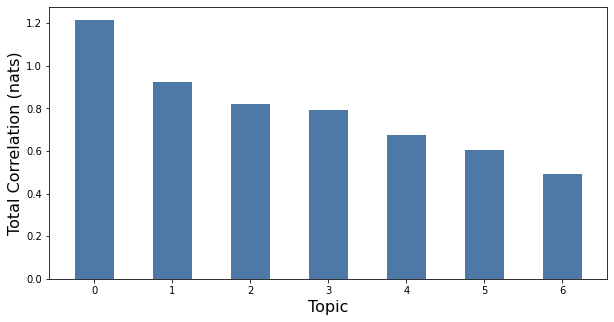

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

Looks like there may be an elbow after 4 or 6 topics.

### Trying Anchors:
For anchors, I'll use some words that I know are in the main topics:
- Education: school, education, teacher
- Economy/Taxes: tax, cut, percent, income, pay
- War/Foreign Policy: military, war
- Healthcare: health, care, insurance, doctor

In [24]:
topic_model = ct.Corex(n_hidden=10, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(cv_model, words=words, docs=X, 
                anchors=[['school', 'education'], 
                         ['tax', 'income'], 
                         ['military', 'war'], 
                         ['health'],
                         ['social']], anchor_strength=10)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: school,education,teacher,child,kid,college,parent,student,public,high
1: tax,income,cut,code,pay,rate,percent,raise,increase,plan
2: war,military,iraq,troop,ii,cold,commander,defense,afghanistan,chief
3: health,care,insurance,cost,universal,affordable,coverage,doctor,mental,premium
4: social,security,medicare,program,retirement,benefit,senior,twenty,inflation,fund
5: year,ago,four,last,two,time,one,city,three,eight
6: job,economy,money,dollar,billion,business,company,million,market,system
7: nuclear,iran,world,ally,weapon,syria,united,country,oil,threat
8: think,believe,life,kind,bin,laden,important,decision,respect,faith
9: court,supreme,justice,tonight,abortion,law,judge,gun,thank,amendment


Plots:

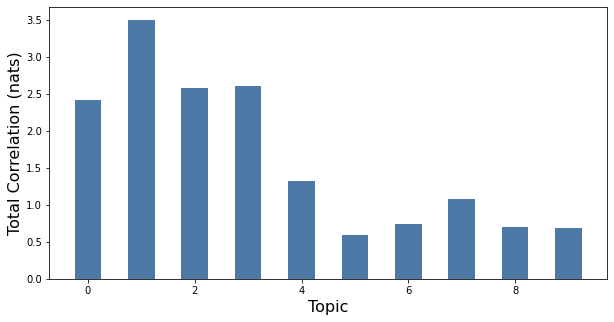

In [25]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

These topics are promising; however, there are some generic topics forming after the main ones, so this will likely take more finetuning.  This is an area for potential future improvement to the final NMF topic modeling.